## Observations and Insights 

#### Observation 1

Capomulin and Ramicane both had similiar, and smaller than Ceftamin and Infubinol, interquartile ranges. This could indicate that these drug regimens were overall more effective that the Ceftamin and Infubinol, but a better measurement would be too look at change in tumor size for these drug regimens. 

#### Observation 2

Ramicane has a lowest median value and lowest lower bound. Since the assumed goal of a drug to reduce tumor volume is to have the smallest tumor volume at the end of the treatment period, this would indicate that Ramicane had the smallest mean and variance in final tumor volume. 

#### Observation 3

Average tumor final volume and mouse weight had a strong positive correlation. This indicates that larger mice have larger tumors. Additional information such as change in tumor volume vs mouse weight would be a good data point to have to further dive into this trend. 

# Load Dependencies and Import Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


# Verify the Number of Mice in Raw DataFrame

In [2]:
# Checking the number of mice.
miceNames = data_df["Mouse ID"].unique()
if len(miceNames) == 249:
    print("The number of mice in the raw dataset is what we expected at 249.")
    print(f'The total number of mice in the raw DataFrame is {data_df["Mouse ID"].count()}')
else:
    print('There is an error. Expected 249 mice and we have {len(data_df["Mount ID"].unique()}')

The number of mice in the raw dataset is what we expected at 249.
The total number of mice in the raw DataFrame is 1893


# Create Cleaned DataFrame

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Store the data in a separate list along
# with another list of the drop locations. 
data_df['Duplicated'] = data_df.duplicated(subset=['Mouse ID','Timepoint'])
duplicatedData = []
dropRow = []
for index, row in data_df.iterrows():
    temp = data_df.loc[index,"Duplicated"]
    if temp == True:
        duplicatedData.append(temp)
        dropRow.append(index)

In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.drop(dropRow)

# Verify the Number of Mice in Clean DataFrame

In [5]:
# Checking the number of mice in the clean DataFrame.
print(f'The number of unique mice in the cleaned DataFrame is {clean_df["Mouse ID"].nunique()}')
print(f'The total number of mice in the cleaned DataFrame is {clean_df["Mouse ID"].count()}')

The number of unique mice in the cleaned DataFrame is 249
The total number of mice in the cleaned DataFrame is 1888


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summaryStats = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summaryStats
# summaryStats.columns
# summaryStats['Mean'] = summaryStats['Tumor Volume (mm3)','Mean'].map("{:.2f}%".format)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [7]:
# Create the bar plot DataFrame and sort values for proper output
regimenCount = clean_df.groupby('Drug Regimen').count()
regimenCount.sort_values(by=['Mouse ID'], ascending=False, inplace=True)

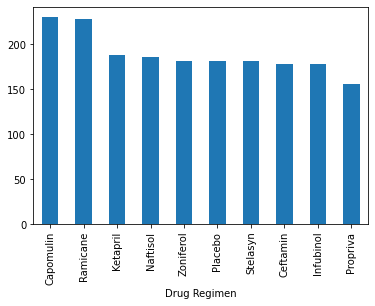

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# NOTE: Need to use DataFrame.plot()
bar1 = regimenCount["Mouse ID"].plot(kind='bar')

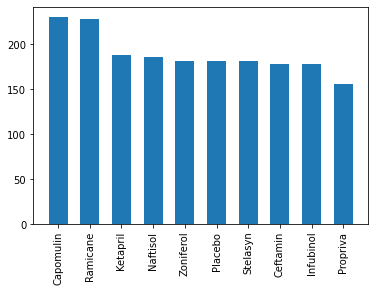

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# NOTE: Need to use pyplot.bar()
bar2 = plt.bar(regimenCount.index, regimenCount["Mouse ID"], width=0.6)
bar2 = plt.xticks(rotation=90)

In [10]:
# Create the pie chart DataFrame and sort values for proper output
sexGroup = clean_df.groupby('Sex').count()

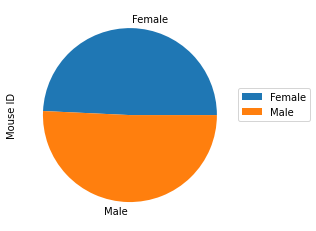

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# NOTE: need to use DataFrame.plot()

pie1 = sexGroup.plot.pie(y='Mouse ID')
pie1 = plt.legend(bbox_to_anchor=(1.35,0.55), loc='right')

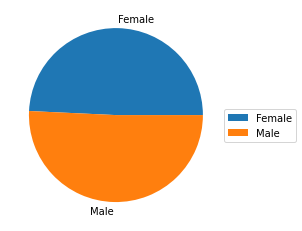

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# NOTE: need to use pyplot.pie()

pie2 = plt.pie(sexGroup["Mouse ID"], labels=sexGroup.index)
pie2 = plt.legend(sexGroup.index, bbox_to_anchor=(1.35,0.55))

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
finalVol_df = clean_df.drop_duplicates(subset=['Mouse ID'], keep='last')
finalVol_df = finalVol_df.drop(labels=['Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Duplicated'], axis=1)

In [34]:
# Put treatments into a list for for loop (and later for plot labels)
plotVals = []
for med in regimens:
    drugFinalVol_df = finalVol_df.loc[finalVol_df['Drug Regimen'] == med, 'Tumor Volume (mm3)']
    plotVals.append(drugFinalVol_df)
    quartiles = drugFinalVol_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)
    outliers = drugFinalVol_df.loc[(drugFinalVol_df > upperBound) | (drugFinalVol_df < lowerBound)]
    if outliers.empty == False:
        output = outliers.values
        print(f'{med} has the following potential outliers: {output}')
    else:
        print(f'{med} has no potential outliers.')

Capomulin has no potential outliers.
Ramicane has no potential outliers.
Infubinol has the following potential outliers: [36.3213458]
Ceftamin has no potential outliers.


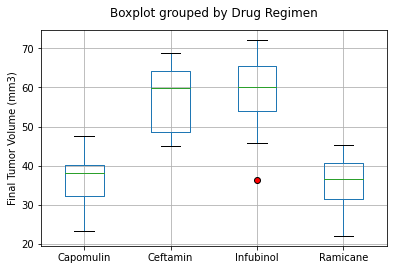

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plotVol_df = finalVol_df.loc[(finalVol_df['Drug Regimen'] == regimens[0]) | (finalVol_df['Drug Regimen'] == regimens[1]) |(finalVol_df['Drug Regimen'] == regimens[2]) |(finalVol_df['Drug Regimen'] == regimens[3])]
redCircle = dict(markerfacecolor='r')
box1 = plotVol_df.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'], flierprops=redCircle)
box1 = plt.xlabel('')
box1 = plt.ylabel('Final Tumor Volume (mm3)')
box1 = plt.title('')

## Line and Scatter Plots

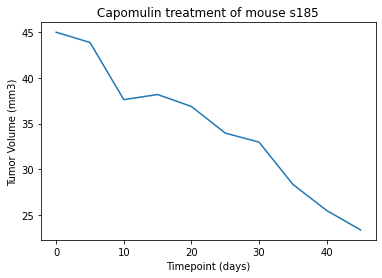

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinMice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
singleMouse = capomulinMice.loc[capomulinMice['Mouse ID'] == capomulinMice.iloc[0]['Mouse ID']]
line1 = plt.plot(singleMouse['Timepoint'],singleMouse['Tumor Volume (mm3)'])
mouseName = capomulinMice.iloc[0]['Mouse ID']
line1 = plt.title(f'Capomulin treatment of mouse {mouseName}')
line1 = plt.xlabel('Timepoint (days)')
line1 = plt.ylabel('Tumor Volume (mm3)')

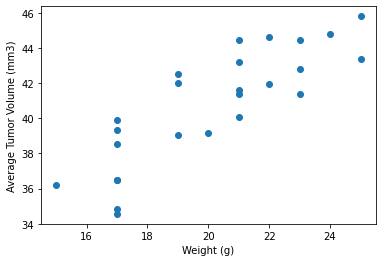

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
averageTumorWeight = capomulinMice.groupby('Mouse ID').mean()
averageTumorWeight
scat1 = plt.scatter(averageTumorWeight['Weight (g)'], averageTumorWeight['Tumor Volume (mm3)'])
scat1 = plt.xlabel('Weight (g)')
scat1 = plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, r_value, p_value, std_err = st.linregress(averageTumorWeight['Weight (g)'], averageTumorWeight['Tumor Volume (mm3)'])
lineq1 = slope*averageTumorWeight['Weight (g)'] + intercept

The correlation between mouse weight and the average tumor volume is 0.84


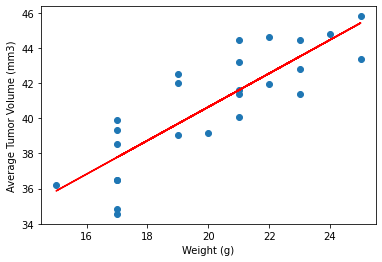

In [19]:
print(f'The correlation between mouse weight and the average tumor volume is {r_value:.2f}')
scat2 = plt.plot(averageTumorWeight['Weight (g)'], lineq1, color='red')
scat2 = plt.scatter(averageTumorWeight['Weight (g)'], averageTumorWeight['Tumor Volume (mm3)'])
scat2 = plt.xlabel('Weight (g)')
scat2 = plt.ylabel('Average Tumor Volume (mm3)')

## Additional Plots

This was a very quickly made plot and is blurred significantly by not isolating the data for each mouse into a list and plotting that individually. Therefore there is a line that tracks back from the end point of one mouse's tumor volume to the beginning value of another mouse's tumor volume. Overall trend still appears to be down. 

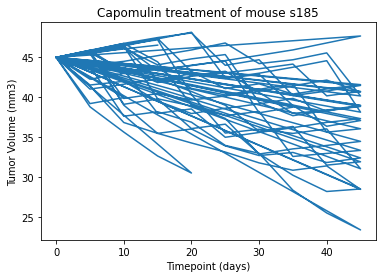

In [36]:
line2 = plt.plot(capomulinMice['Timepoint'],capomulinMice['Tumor Volume (mm3)'])
line2 = plt.title(f'Capomulin treatment of mouse {mouseName}')
line2 = plt.xlabel('Timepoint (days)')
line2 = plt.ylabel('Tumor Volume (mm3)')